In [1]:
import torch

## Part 1-1

In [2]:
x=torch.tensor(3.5)
x

tensor(3.5000)

In [3]:
y=3
x+y

tensor(6.5000)

In [4]:
x=torch.tensor(3.5, requires_grad=True)
x

tensor(3.5000, requires_grad=True)

In [5]:
y=(x-1)*(x-2)*(x-3)
y

tensor(1.8750, grad_fn=<MulBackward0>)

In [6]:
# 기울기
y.backward()

In [7]:
x.grad

tensor(5.7500)

In [8]:
x=torch.tensor(3.5, requires_grad=True)
y=x*x
z=2*y+3

In [9]:
z.backward()

In [10]:
x.grad

tensor(14.)

In [11]:
a=torch.tensor(2.0, requires_grad=True)
b=torch.tensor(1.0, requires_grad=True)

x=2*a+3*b
y=5*a*a + 3*b*b*b
z=2*x+3*y

In [12]:
z.backward()

In [13]:
a.grad

tensor(64.)

In [14]:
b.grad

tensor(33.)

## Part 1-2

In [15]:
from google.colab import drive
drive.mount('./mount')

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [16]:
import pandas

In [17]:
df=pandas.read_csv("mount/My Drive/Colab Notebooks/data_gan/mnist_train.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [19]:
import matplotlib.pyplot as plt

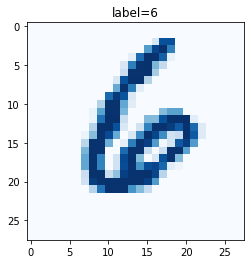

In [20]:
row=13
data=df.iloc[row]

label=data[0]

img=data[1:].values.reshape(28, 28)
plt.title("label="+str(label))
plt.imshow(img, interpolation='none', cmap='Blues')
plt.show()

In [21]:
import torch.nn as nn

In [22]:
class Classifier(nn.Module):

  def __init__(self):
    # 부모 클래스 초기화
    super().__init__()

    # 신경망 레이어 정의
    self.model=nn.Sequential(
        nn.Linear(784, 200), # 784개의 노드로부터 200개 노드까지 완전연결
        nn.Sigmoid(),
        nn.Linear(200,10), # 200개 노드를 다시 10개로 연결, 중간 고자ㅓㅇ에 은닉 레이어와 10개 노드의 출력 레이어간 가중치 포함
        nn.Sigmoid()
    )

    # 손실함수 결정
    self.loss_function=nn.MSELoss()

    # SGD 옵티마이저 설정
    self.optimiser=torch.optim.SGD(self.parameters(), lr=0.010)

    # 변수 초기화
    self.counter=0
    self.progress=[]

    pass 


  def forward(self, inputs):
    # 모델 실행
    return self.model(inputs)


  def train(self, inputs, targets):
    # 신경망 출력 계산
    outputs=self.forward(inputs)

    # 손실 계산
    loss=self.loss_function(outputs, targets)

    # 기울기 0으로 초기화, 역전파 실행, 가중치 갱신
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()



    # 카운터 증가시키고 10회마다 오차 저장
    self.counter+=1
    if (self.counter %10==0):
      self.progress.append(loss.item())
      pass
    if (self.counter%10000==0):
      print("counter= ", self.counter)
      pass
  
  def plot_progress(self):
    df=pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker=".", grid=True, yticks=(0, 0.25, 0.5))
    pass

In [23]:
from torch.utils.data import Dataset

In [24]:
class MnistDataset(Dataset):

  def __init__(self, csv_file):
    self.data_df=pandas.read_csv(csv_file, header=None)
    pass
  
  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    # 이미지 목표
    label=self.data_df.iloc[index, 0]
    target=torch.zeros((10))
    target[label]=1.0

    # 0-255의 이미지를 0-1로 정규화
    image_values=torch.FloatTensor(self.data_df.iloc[index, 1:].values)

    # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
    return label, image_values, target

  def plot_image(self, index):
    img=self.data_df.iloc[index, 1:].values.reshape(28, 28)
    plt.title("label="+str(self.data_df.iloc[index, 0]))
    plt.imshow(img, interpolation="none", cmap="Blues")
    pass
  pass


In [25]:
mnist_dataset=MnistDataset("mount/My Drive/Colab Notebooks/data_gan/mnist_train.csv")

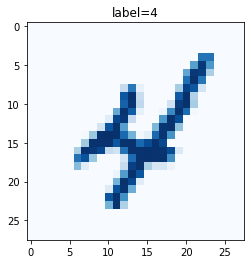

In [26]:
mnist_dataset.plot_image(9)

In [27]:
# 신경망 생성
C = Classifier()

# MNIST 데이터에 대한 훈련 진행
epochs=3

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass


training epoch 1 of 3
counter=  10000
counter=  20000
counter=  30000
counter=  40000
counter=  50000
counter=  60000
training epoch 2 of 3
counter=  70000
counter=  80000
counter=  90000
counter=  100000
counter=  110000
counter=  120000
training epoch 3 of 3
counter=  130000
counter=  140000
counter=  150000
counter=  160000
counter=  170000
counter=  180000


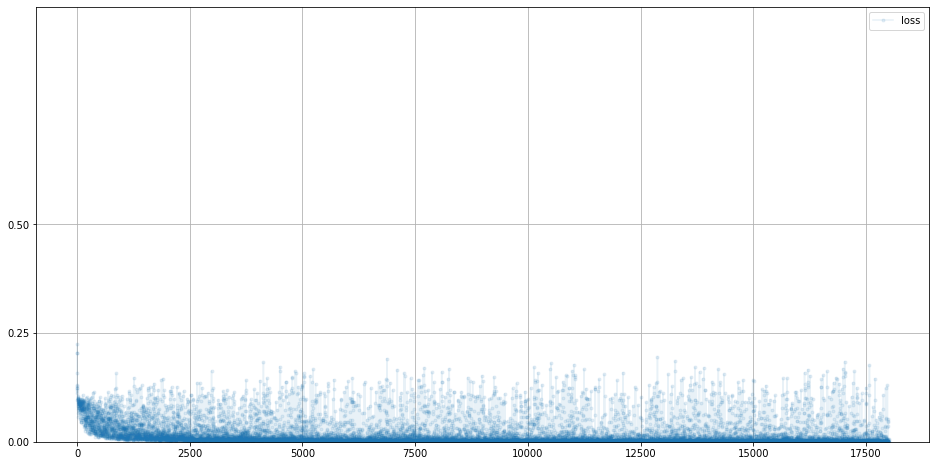

In [28]:
C.plot_progress()

In [32]:
mnist_test_dataset=MnistDataset("mount/My Drive/Colab Notebooks/data_gan/mnist_test.csv")

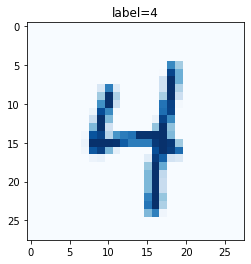

In [33]:
#
record=19
mnist_test_dataset.plot_image(record)

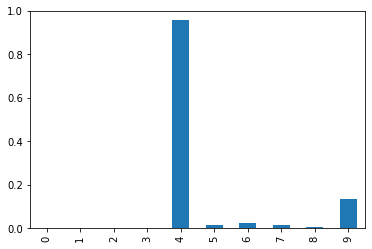

In [34]:
image_data=mnist_test_dataset[record][1]

# 훈련된 신경망으로부터 쿼리
output=C.forward(image_data)

# 텐서 출력
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [35]:
# 훈련된 신경망을 데이터셋에 테스트

score=0
items=0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer=C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax()==label):
    score+=1
    pass
  items+=1
  pass

print(score, items, score/items)

9295 10000 0.9295
